In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import datetime as dt

In [2]:
drivers_data=pd.read_csv('/content/dataset/drivers_preprocessed.csv')
constructors_data=pd.read_csv('/content/dataset/constructors_preprocessed.csv')
race_data=pd.read_csv('/content/dataset/races_preprocessed.csv')
results_data=pd.read_csv('/content/dataset/results_preprocessed.csv')

In [4]:
driver_standings=pd.read_csv('/content/dataset/driver_standings_preprocessed.csv')
constructor_standings=pd.read_csv('/content/dataset/constructor_standings_preprocessed.csv')
lap_times_data=pd.read_csv('/content/dataset/lap_times_preprocessed.csv')
circuit_data=pd.read_csv('/content/dataset/circuits_preprocessed.csv')
pitstops_data=pd.read_csv('/content/dataset/pit_stops_preprocessed.csv')
seasons_data=pd.read_csv('/content/dataset/seasons_preprocessed.csv')

##1 DRIVER AND CONSTRUCTOR PEROFORMANCE

In [ ]:
merged_df = results_data.merge(drivers_data['driverId'], on='driverId', how='inner')\
                   .merge(constructors_data['constructorId'], on='constructorId', how='inner')\
                   .merge(race_data[['raceId', 'year', 'date']], on='raceId', how='inner')

In [ ]:
merged_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,date
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,2008-03-16
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008,2008-03-16
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,2008,2008-03-16
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,2008,2008-03-16
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,2008,2008-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,26760,1144,825,210,20,14,16,16,16,0.0,57,\N,\N,57,1,1:25.637,222.002,11,2024,2024-12-08
26755,26761,1144,859,215,30,12,17,17,17,0.0,55,\N,\N,52,12,1:28.751,214.212,5,2024,2024-12-08
26756,26762,1144,822,15,77,9,\N,R,18,0.0,30,\N,\N,14,19,1:29.482,212.462,130,2024,2024-12-08
26757,26763,1144,861,3,43,20,\N,R,19,0.0,26,\N,\N,5,17,1:29.411,212.631,5,2024,2024-12-08


DRIVERS AND CONSTRUCTORS

Win Ratio:

*   Count races where positionOrder == 1.
*   Divide by total races per driver.

Podium Finishes:

*   Count races where positionOrder <= 3. (ASSUMPTION)



In [ ]:
driver_stats = merged_df.groupby('driverId').agg(
    total_races=('raceId', 'count'),
    total_wins=('positionOrder', lambda x: (x == 1).sum()),
    podiums=('positionOrder', lambda x: (x <= 3).sum()),
    total_points=('points', 'sum')
).reset_index()

driver_stats['win_ratio'] = (driver_stats['total_wins'] / driver_stats['total_races']) * 100
driver_stats['podium_percentage'] = (driver_stats['podiums'] / driver_stats['total_races']) * 100


In [ ]:
constructor_stats = merged_df.groupby('constructorId').agg(
    total_races=('raceId', 'count'),
    total_wins=('positionOrder', lambda x: (x == 1).sum()),
    podiums=('positionOrder', lambda x: (x <= 3).sum()),
    total_points=('points', 'sum')
).reset_index()

constructor_stats['win_ratio'] = (constructor_stats['total_wins'] / constructor_stats['total_races']) * 100
constructor_stats['podium_percentage'] = (constructor_stats['podiums'] / constructor_stats['total_races']) * 100

### PLOTS

<ipython-input-24-d86be2dec73a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_drivers, x='win_ratio', y='driverId', palette='coolwarm')


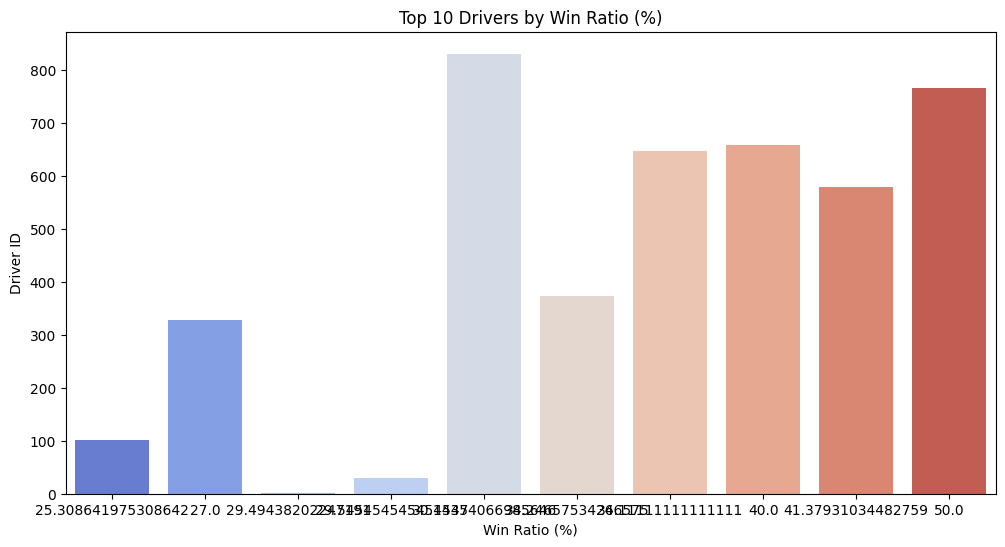

<ipython-input-24-d86be2dec73a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_constructors, x='win_ratio', y='constructorId', palette='viridis')


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

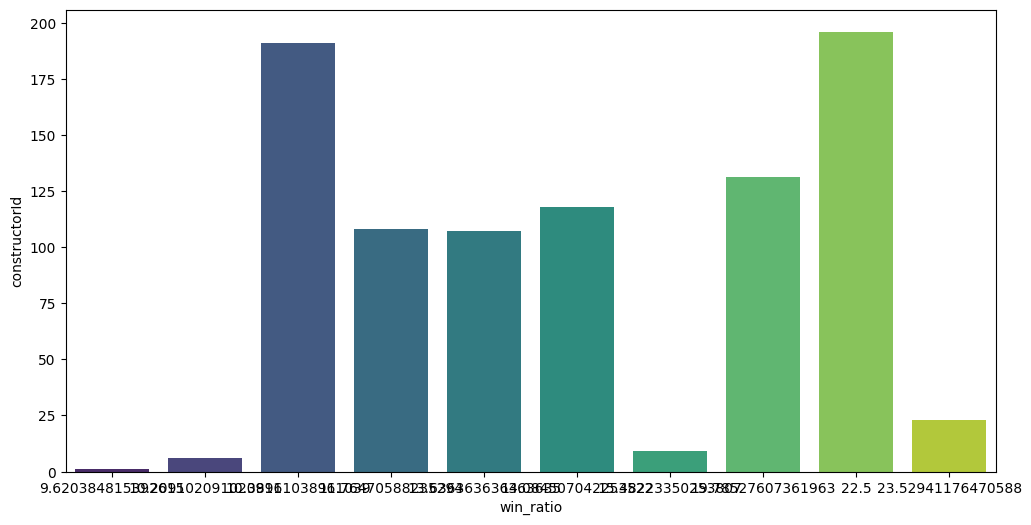

In [ ]:
# Plot Top 10 Drivers by Win Ratio
top_drivers = driver_stats.sort_values(by='win_ratio', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_drivers, x='win_ratio', y='driverId', palette='coolwarm')
plt.title('Top 10 Drivers by Win Ratio (%)')
plt.xlabel('Win Ratio (%)')
plt.ylabel('Driver ID')
plt.show()

# Plot Top 10 Constructors by Win Ratio
top_constructors = constructor_stats.sort_values(by='win_ratio', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_constructors, x='win_ratio', y='constructorId', palette='viridis')
plt.title

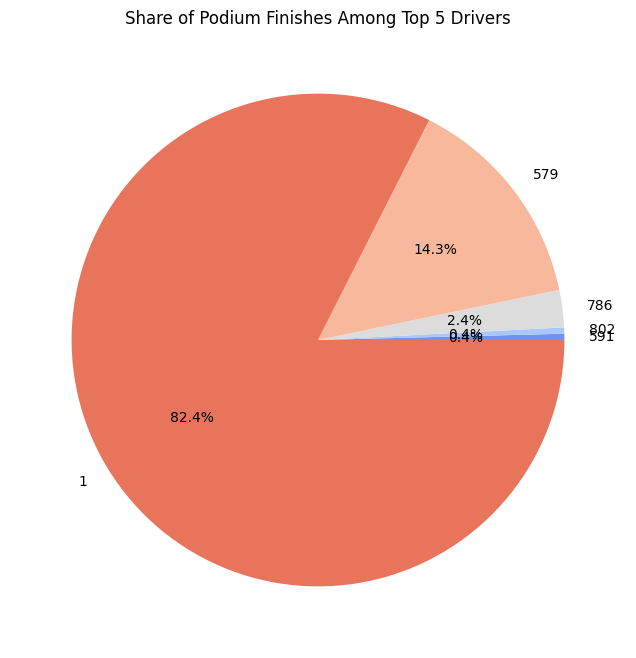

In [ ]:
# Top 5 drivers by podium percentage
top_podium_drivers = driver_stats.sort_values('podium_percentage', ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_podium_drivers['podiums'], labels=top_podium_drivers['driverId'].astype(str), autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 5))
plt.title("Share of Podium Finishes Among Top 5 Drivers")
plt.show()

CAREER LONGIVTY - IS HOW LONG THE DRIVER CONSISTENTLY THERE IN THE GAME

In [ ]:
career_span = merged_df.groupby('driverId').agg(
    career_start=('year', 'min'), #starting of the career
    career_end=('year', 'max'), #ending of the career
    total_races=('raceId', 'count') #how many total races participated
).reset_index()

career_span['career_length_years'] = career_span['career_end'] - career_span['career_start'] + 1    #calculate career length

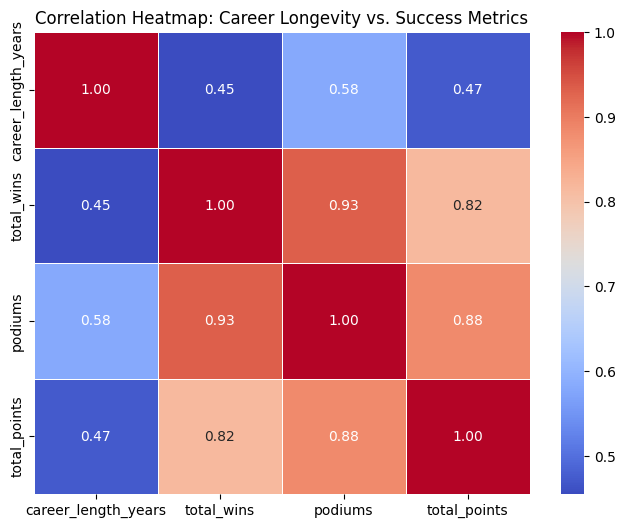

In [ ]:
driver_full_stats = career_span.merge(driver_stats, on='driverId')

#correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(driver_full_stats[['career_length_years', 'total_wins', 'podiums', 'total_points']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Career Longevity vs. Success Metrics")
plt.show()


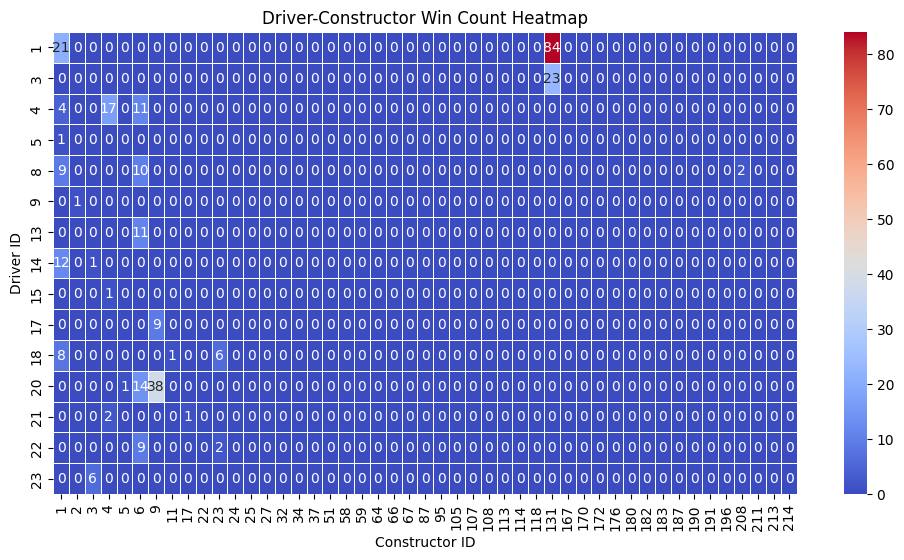

In [ ]:
driver_constructor_wins = merged_df[merged_df['positionOrder'] == 1].groupby(['driverId', 'constructorId']).size().unstack().fillna(0)

#driver and constructor wins representation in heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(driver_constructor_wins[0:15][0:15], cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Constructor ID")
plt.ylabel("Driver ID")
plt.title("Driver-Constructor Win Count Heatmap")
plt.show()


# 8 Driver CONSISTENCY IN RACE PERFORMANCE


In [ ]:
merged_df = results_data.merge(drivers_data, on='driverId', how='left')
merged_df['driver_name'] = merged_df['forename'] + " " + merged_df['surname']

In [ ]:
# Calculate consistency metrics
consistency_df = merged_df.groupby('driver_name')['positionOrder'].agg(['mean', 'std', 'count']).reset_index()
consistency_df.rename(columns={'mean': 'avg_position', 'std': 'position_std', 'count': 'total_races'}, inplace=True)

In [ ]:
# Calculate top 5 finishes percentage
merged_df['top5_finish'] = merged_df['positionOrder'] <= 5
top5_percentage = merged_df.groupby('driver_name')['top5_finish'].mean().reset_index().rename(columns={'top5_finish': 'top5_percentage'})
consistency_df = consistency_df.merge(top5_percentage, on='driver_name')

In [ ]:
fig1 = px.scatter(
    consistency_df,
    x='position_std',
    y='avg_position',
    size='total_races',
    color='top5_percentage',
    hover_name='driver_name',
    color_continuous_scale='Viridis',
    size_max=60,
    title="Driver Consistency: Fluctuation vs. Performance"
)
fig1.update_layout(xaxis_title="Position Standard Deviation", yaxis_title="Average Finish Position")
fig1.update_yaxes(autorange="reversed")  # Lower position is better
fig1.show()

In [ ]:
top_consistent = consistency_df.sort_values('position_std').head(10)
fig2 = px.bar(
    top_consistent,
    x='position_std',
    y='driver_name',
    orientation='h',
    color='position_std',
    color_continuous_scale='Blues',
    title="Top 10 Consistent Drivers (Lowest Std Dev)"
)
fig2.update_layout(xaxis_title="Position Standard Deviation", yaxis_title="Driver", yaxis=dict(autorange="reversed"))
fig2.show()

In [ ]:
consistent_driver = consistency_df.sort_values('position_std').iloc[0]['driver_name']
fluctuating_driver = consistency_df.sort_values('position_std', ascending=False).iloc[0]['driver_name']

# Filter races for both drivers
sample_df = merged_df[merged_df['driver_name'].isin([consistent_driver, fluctuating_driver])]

fig3 = px.line(
    sample_df,
    x='raceId',
    y='positionOrder',
    color='driver_name',
    markers=True,
    title=f"Race Finishing Trends: {consistent_driver} vs. {fluctuating_driver}"
)
fig3.update_yaxes(autorange="reversed", title="Finishing Position")
fig3.update_xaxes(title="Race ID")
fig3.show()

# 6 DRIVER MOVEMENTS AND TEAM NETWORKS

1) Mapping driver name to the corresponding constructor names

2) Driver constructor time merge the data

3) Get the tracking transition

In [ ]:
results_df = results_data.merge(race_data[['raceId', 'year']], on='raceId')
drivers_data['driver_name'] = drivers_data['forename'] + " " + drivers_data['surname']

results_df = results_df.merge(drivers_data[['driverId', 'driver_name']], on='driverId')
results_df = results_df.merge(constructors_data[['constructorId', 'name']], on='constructorId').rename(columns={'name': 'constructor_name'})

driver_team_season = results_df[['year', 'driver_name', 'constructor_name']].drop_duplicates()
driver_team_season = driver_team_season.sort_values(['driver_name', 'year'])

For each driver check either they switched the teams

In [ ]:
transitions = []

for driver in driver_team_season['driver_name'].unique():
    driver_data = driver_team_season[driver_team_season['driver_name'] == driver]
    prev_team = None
    for _, row in driver_data.iterrows():
        current_team = row['constructor_name']
        if prev_team and current_team != prev_team:
            transitions.append((prev_team, current_team, driver))
        prev_team = current_team

# Create a DataFrame for transitions
transitions_df = pd.DataFrame(transitions, columns=['From', 'To', 'Driver'])

graph


*   Nodes: Constructors
  
*   Edges: Driver transitions



In [ ]:
G = nx.DiGraph()

for _, row in transitions_df.iterrows():
    G.add_edge(row['From'], row['To'], driver=row['Driver'])

pos = nx.spring_layout(G, k=0.5, iterations=50)

In [ ]:
# Create edge traces
edge_trace = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    driver = edge[2]['driver']

    edge_trace.append(
        go.Scatter(
            x=[x0, x1, None],
            y=[y0, y1, None],
            line=dict(width=1, color='blue'),
            hoverinfo='text',
            text=f"{driver}: {edge[0]} ➔ {edge[1]}",
            mode='lines')
    )

# Create node trace
node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    text=[node for node in G.nodes()],
    mode='markers+text',
    textposition='top center',
    hoverinfo='text',
    marker=dict(size=15, color='orange', line=dict(width=2))
)

# Final figure
fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(
                    title="Driver Movements Across Teams",
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
)

fig.show()


# 5 HYPOTHETICAL DRIVER SWAPS

Swap two drivers between different teams and predict the impact on team and driver standings.

In [ ]:

driver_A = 'Lewis Hamilton'
driver_B = 'Max Verstappen'

driver_A_id = drivers_data[(drivers_data['forename'] == 'Lewis') & (drivers_data['surname'] == 'Hamilton')]['driverId'].values[0]
driver_B_id = drivers_data[(drivers_data['forename'] == 'Max') & (drivers_data['surname'] == 'Verstappen')]['driverId'].values[0]

# Get current constructors
current_driver_teams = results_df[['driverId', 'constructorId']].drop_duplicates()
driver_A_team = current_driver_teams[current_driver_teams['driverId'] == driver_A_id]['constructorId'].values[0]
driver_B_team = current_driver_teams[current_driver_teams['driverId'] == driver_B_id]['constructorId'].values[0]


In [ ]:
swapped_driver_standings = driver_standings.copy()

swapped_driver_standings.loc[swapped_driver_standings['driverId'] == driver_A_id, 'constructorId'] = driver_B_team
swapped_driver_standings.loc[swapped_driver_standings['driverId'] == driver_B_id, 'constructorId'] = driver_A_team


In [ ]:
swapped_constructor_standings = swapped_driver_standings.groupby('constructorId')['points'].sum().reset_index()
swapped_constructor_standings = swapped_constructor_standings.merge(constructors_data[['constructorId', 'name']], on='constructorId')
swapped_constructor_standings = swapped_constructor_standings.sort_values(by='points', ascending=False)


In [ ]:
fig_driver = go.Figure()

# Original standings
original_driver_standings = driver_standings.groupby('driverId')['points'].max().reset_index()
original_driver_standings = original_driver_standings.merge(drivers_data[['driverId', 'forename', 'surname']], on='driverId')
original_driver_standings['driver_name'] = original_driver_standings['forename'] + ' ' + original_driver_standings['surname']

original_driver_standings = original_driver_standings.head(10)
fig_driver.add_trace(go.Bar(
    x=original_driver_standings['driver_name'],
    y=original_driver_standings['points'],
    name='Original Standings'
))

# Swapped standings
swapped_driver_standings_sum = swapped_driver_standings.groupby('driverId')['points'].max().reset_index()
swapped_driver_standings_sum = swapped_driver_standings_sum.merge(drivers_data[['driverId', 'forename', 'surname']], on='driverId')
swapped_driver_standings_sum['driver_name'] = swapped_driver_standings_sum['forename'] + ' ' + swapped_driver_standings_sum['surname']

fig_driver.add_trace(go.Bar(
    x=swapped_driver_standings_sum['driver_name'],
    y=swapped_driver_standings_sum['points'],
    name='Post Swap Standings'
))

fig_driver.update_layout(title="Driver Standings: Original vs Post Swap",
                         xaxis_title="Driver",
                         yaxis_title="Total Points",
                         barmode='group')
fig_driver.show()


   driverId  points   forename     surname       driver_name
0         1   413.0      Lewis    Hamilton    Lewis Hamilton
1         3   385.0       Nico     Rosberg      Nico Rosberg
2        20   397.0  Sebastian      Vettel  Sebastian Vettel
3       830   575.0        Max  Verstappen    Max Verstappen
4       846   374.0      Lando      Norris      Lando Norris


In [ ]:
fig_constructor = go.Figure()

# Original constructor standings
original_constructor_standings = constructor_standings.groupby('constructorId')['points'].max().reset_index()
original_constructor_standings = original_constructor_standings.merge(constructors_data[['constructorId', 'name']], on='constructorId')

original_constructor_standings = original_constructor_standings.head(10)
fig_constructor.add_trace(go.Bar(
    x=original_constructor_standings['name'],
    y=original_constructor_standings['points'],
    name='Original Standings'
))

# Swapped constructor standings
fig_constructor.add_trace(go.Bar(
    x=swapped_constructor_standings['name'],
    y=swapped_constructor_standings['points'],
    name='Post Swap Standings'
))

fig_constructor.update_layout(title="Constructor Standings: Original vs Post Swap",
                              xaxis_title="Constructor",
                              yaxis_title="Total Points",
                              barmode='group')
fig_constructor.show()


# 10 BEST TEAM LINE UP

In [ ]:
# agg total points for each driver
driver_performance = results_df.groupby(['driverId', 'constructorId'])['points'].sum().reset_index()
top_drivers = driver_performance.sort_values(by='points', ascending=False).head(10)

# agg team performance on top drivers
top_teams = top_drivers.groupby('constructorId')['points'].sum().reset_index()
top_teams = top_teams.sort_values(by='points', ascending=False).head(2)
best_lineup = top_teams.merge(constructors_data[['constructorId', 'name']], on='constructorId')

print("Best Team Lineup (Based on Driver Performance):")
print(best_lineup[['name', 'points']])


Best Team Lineup (Based on Driver Performance):
       name  points
0  Mercedes  6746.5
1   Ferrari  6060.0


In [ ]:
fig = px.bar(
    best_lineup,
    x='name',  # Team names
    y='points',  # Total points
    color='name',
    text='points',
    title=' Best Team Lineup Based on Driver Performance',
    labels={'name': 'Team', 'points': 'Total Points'}
)

fig.update_layout(showlegend=False, xaxis_title="Team", yaxis_title="Total Points")
fig.update_traces(textposition='outside')
fig.show()

# 9 LAP TIME EFFICIENCY

In [ ]:
lap_results_df = lap_times_data.merge(results_data, on=['raceId', 'driverId'])

# merge constructor,race,circuit
lap_results_df = lap_results_df.merge(constructors_data[['constructorId','name']], on='constructorId')
lap_results_df = lap_results_df.merge(race_data[['raceId', 'circuitId']], on='raceId')
lap_results_df = lap_results_df.merge(circuit_data[['circuitId', 'name']], on='circuitId', suffixes=('', '_circuit'))
print(lap_results_df.columns)

# Calculate average lap time per constructor on each circuit
team_lap_efficiency = lap_results_df.groupby(['name_circuit', 'name'])['milliseconds_x'].mean().reset_index()
team_lap_efficiency.rename(columns={'name': 'constructor', 'milliseconds_x': 'avg_lap_time_ms'}, inplace=True)

Index(['raceId', 'driverId', 'lap', 'position_x', 'time_x', 'milliseconds_x',
       'resultId', 'constructorId', 'number', 'grid', 'position_y',
       'positionText', 'positionOrder', 'points', 'laps', 'time_y',
       'milliseconds_y', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'name', 'circuitId', 'name_circuit'],
      dtype='object')


In [ ]:
fig = px.bar(
    team_lap_efficiency[0:100],
    x='constructor',
    y='avg_lap_time_ms',
    color='name_circuit',
    title='Team Lap Time Efficiency Across Circuits',
    labels={'constructor': 'Team', 'avg_lap_time_ms': 'Avg Lap Time (ms)', 'name_circuit': 'Circuit'}
)

fig.update_layout(xaxis_title="Teams", yaxis_title="Avg Lap Time (ms)", barmode='group')
fig.show()

# 2. QUALIFYING AND RACE PERFORMANCE

In [ ]:
results_data['positionOrder'] = pd.to_numeric(results_data['positionOrder'], errors='coerce')
results_data['grid'] = pd.to_numeric(results_data['grid'], errors='coerce')
results_data['position_change'] = results_data['grid'] - results_data['positionOrder']

results_with_drivers = results_data.merge(drivers_data[['driverId', 'forename', 'surname']], on='driverId')
results_with_drivers['driver_name'] = results_with_drivers['forename'] + ' ' + results_with_drivers['surname']

In [ ]:
# Starting Grid vs. Final Position
fig1 = px.scatter(results_with_drivers, x='grid', y='positionOrder', color='driver_name',
                  title='Qualifying vs. Race Performance',
                  labels={'grid': 'Starting Grid Position', 'positionOrder': 'Final Race Position'},
                  hover_data=['driver_name'])
fig1.update_layout(xaxis_title='Starting Grid', yaxis_title='Final Position', yaxis_autorange='reversed')
fig1.show()


In [ ]:
# Drivers Who Make Up Most Positions
position_gain = results_with_drivers.groupby('driver_name')['position_change'].mean().reset_index()
position_gain = position_gain.sort_values(by='position_change', ascending=False)

fig2 = px.bar(position_gain, x='driver_name', y='position_change',
              title='Drivers Who Gain Most Positions on Average',
              labels={'driver_name': 'Driver', 'position_change': 'Avg Positions Gained'})
fig2.show()

# 3.PIT STOP STRATEGIES

In [ ]:
circuits = circuit_data.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers_data.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = constructors_data.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})
races = race_data.set_index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time'])

races.index = races.index.set_names(['raceId','year','round','circuitId','raceName','date','time','raceUrl','a','b'])
races = races[[]].reset_index()[['raceId','year','round','circuitId','raceName','date','time','raceUrl']]
races.set_index('raceId',inplace=True)
races['date'] = races['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
pitStops = pitstops_data.rename(columns={'time':'pitTime'})
pitStops['seconds'] = pitStops['milliseconds'].apply(lambda x: x/1000)
results_data['milliseconds'] = pd.to_numeric(results_data['milliseconds'], errors='coerce')
results_data['seconds'] = results_data['milliseconds'].apply(lambda x: x/1000)

In [ ]:
newResults = pd.merge(results_data,races,left_on='raceId',right_index=True,how='left')
newResults = pd.merge(newResults,circuits,left_on='circuitId',right_index=True,how='left')
newResults = pd.merge(newResults,constructors,left_on='constructorId',right_index=True,how='left')
newResults = pd.merge(newResults,drivers,left_on='driverId',right_index=True,how='left')

In [ ]:
newPitStops = pd.merge(pitStops,races,left_on='raceId',right_index=True,how='left')
newPitStops = pd.merge(newPitStops,circuits,left_on='circuitId',right_index=True,how='left')
newPitStops = pd.merge(newPitStops,newResults[['raceId','driverId','driverName','constructorId','constructorName']],left_on=['raceId','driverId'],right_on=['raceId','driverId'])


In [ ]:
filteredPitStops = newPitStops[newPitStops['seconds'] <= 50]

filteredPitStopsMean = (
    filteredPitStops
    .groupby(['constructorName', 'year'])['seconds']
    .mean()
    .reset_index()
)

In [ ]:
# Filter out pit stop times over 50 seconds
filteredPitStops = newPitStops[newPitStops['milliseconds'] <= 50]

# Calculate mean pit stop times per constructor and year
filteredPitStopsMean = (
    filteredPitStops
    .groupby(['constructorName', 'year'])['milliseconds']
    .mean()
    .reset_index()
)

In [ ]:
fig = px.box(newPitStops[newPitStops['seconds']<50].groupby(by=['raceId','raceName','date','constructorName'])['seconds'].mean().reset_index().sort_values(by='seconds',ascending=True),
                 x='constructorName',
                 y='seconds',
                 color='constructorName'
                )
fig.update_layout(
    title_text='Pit Stop Durations by Constructor from 2011 to date',
)
fig.show()

# 4 HEAD TO HEAD DRIVER ANALYSIS

In [ ]:
driver_results = pd.merge(results_data, drivers_data, on='driverId', how='left')
driver_results = pd.merge(driver_results, race_data[['raceId', 'year']], on='raceId', how='left')

head_to_head = driver_results.merge(
    driver_results,
    on='raceId',
    suffixes=('_driver1', '_driver2')
)
head_to_head = head_to_head[head_to_head['driverId_driver1'] != head_to_head['driverId_driver2']]

# Determine wins in head-to-head (better finishing position)
head_to_head['driver1_win'] = head_to_head['positionOrder_driver1'] < head_to_head['positionOrder_driver2']

# Count head-to-head results
head_to_head_stats = (
    head_to_head.groupby(['driverRef_driver1', 'driverRef_driver2'])
    ['driver1_win']
    .agg(['count', 'sum'])
    .reset_index()
)

head_to_head_stats.rename(columns={
    'driverRef_driver1': 'Driver 1',
    'driverRef_driver2': 'Driver 2',
    'count': 'Total Races',
    'sum': 'Driver 1 Wins'
}, inplace=True)

# win percentages
print(head_to_head_stats)
head_to_head_stats['Driver 2 Wins'] = head_to_head_stats['Total Races'] - head_to_head_stats['Driver 1 Wins']
head_to_head_stats['Driver 1 Win %'] = (head_to_head_stats['Driver 1 Wins'] / head_to_head_stats['Total Races']) * 100
head_to_head_stats['Driver 2 Win %'] = (head_to_head_stats['Driver 2 Wins'] / head_to_head_stats['Total Races']) * 100

competitive_rivalries = head_to_head_stats[head_to_head_stats['Total Races'] > 10].copy()

# Win Difference
competitive_rivalries.loc[:, 'Win Difference'] = abs(
    competitive_rivalries['Driver 1 Win %'] - competitive_rivalries['Driver 2 Win %']
)

competitive_rivalries = competitive_rivalries.sort_values(by='Win Difference')
print(competitive_rivalries)


<ipython-input-185-05c29d511a8b>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



      Driver 1  Driver 2  Total Races  Driver 1 Wins
0       Cannoc   adamich            1              0
1       Cannoc      amon            1              0
2       Cannoc    barber            1              1
3       Cannoc  beltoise            1              0
4       Cannoc   bonnier            1              1
...        ...       ...          ...            ...
50437   zunino     stohr            2              1
50438   zunino     stuck            2              1
50439   zunino     surer            8              4
50440   zunino    tambay            4              3
50441   zunino    watson           11              4

[50442 rows x 4 columns]
         Driver 1    Driver 2  Total Races  Driver 1 Wins  Driver 2 Wins  \
44923     surtees   pescarolo           24             12             12   
6793      brabham  morbidelli           18              9              9   
6858    brambilla      arnoux           12              6              6   
6862    brambilla    beltoise     

In [ ]:

competitive_rivalries_sorted = competitive_rivalries.sort_values(by='Win Difference')
competitive_rivalries_sorted['Rivalry'] = competitive_rivalries_sorted['Driver 1'] + ' vs ' + competitive_rivalries_sorted['Driver 2']

fig = px.bar(
    competitive_rivalries_sorted ,
    x='Rivalry',
    y='Win Difference',
    color='Win Difference',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Top 10 Most Competitive Driver Rivalries',
    labels={'Win Difference': 'Win % Difference', 'Rivalry': 'Driver Rivalries'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    font=dict(color='black'),
    title_font=dict(size=20)
)

fig.show()


# 7. TEAM PERFORMANCE COMPARISON

In [ ]:
# BEST TEAM AMONG ALL
top_teams = results_df.groupby('constructorId')['points'].sum().reset_index()
top_teams = top_teams.sort_values(by='points', ascending=False)
best_lineup = top_teams.head(1)

best_lineup = best_lineup.merge(constructors_data[['constructorId', 'name']], on='constructorId')

print("Best Team:")
print(best_lineup[['name', 'points']])

Best Team:
      name    points
0  Ferrari  11091.27


In [ ]:

results_df = pd.merge(results_data, race_data[['raceId', 'circuitId']], on='raceId', how='left')

team_circuit_performance = results_df.groupby(['constructorId', 'circuitId'])['points'].sum().reset_index()
team_overall_performance = results_df.groupby('constructorId')['points'].sum().reset_index()

# Merge with constructor names
team_circuit_performance = team_circuit_performance.merge(constructors_data[['constructorId', 'name']], on='constructorId')
team_overall_performance = team_overall_performance.merge(constructors_data[['constructorId', 'name']], on='constructorId')

# Plot team performance considering circuit factor
fig1 = px.bar(
    team_circuit_performance,
    x='name',
    y='points',
    color='circuitId',
    title='Team Performance by Circuit',
    labels={'name': 'Constructor', 'points': 'Points', 'circuitId': 'Circuit'}
)
fig1.update_layout(xaxis_tickangle=-45)
fig1.show()

# Plot overall team performance without circuit factor
fig2 = px.bar(
    team_overall_performance.sort_values(by='points', ascending=False),
    x='name',
    y='points',
    title='Overall Team Performance',
    labels={'name': 'Constructor', 'points': 'Total Points'}
)
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()


# 13 DRIVER SPECIFIC TRACK STRUGGLES

Calculate Average Finishing Position per Driver per Circuit.

Rank Circuits Based on Driver's Performance.

Highlight Best and Worst Tracks for Each Driver.

In [ ]:
driver_circuit_performance = pd.merge(results_data, race_data[['raceId', 'circuitId']], on='raceId', how='left')
driver_circuit_performance = pd.merge(driver_circuit_performance, circuit_data[['circuitId', 'name']], on='circuitId', how='left')
driver_circuit_performance = pd.merge(driver_circuit_performance, drivers_data[['driverId', 'driverRef']], on='driverId', how='left')

#average finishing position per driver per circuit
driver_avg_positions = (
    driver_circuit_performance.groupby(['driverRef', 'name'])['positionOrder']
    .mean()
    .reset_index()
    .rename(columns={'name': 'Circuit', 'positionOrder': 'Avg Finish Position'})
)

# Identify top 5 circuits where drivers excel (lowest average position)
best_tracks = driver_avg_positions.sort_values(['driverRef', 'Avg Finish Position']).groupby('driverRef').head(5)

# Identify bottom 5 circuits where drivers struggle (highest average position)
worst_tracks = driver_avg_positions.sort_values(['driverRef', 'Avg Finish Position'], ascending=False).groupby('driverRef').head(5)




In [ ]:
fig1 = px.bar(    #driver struggles
    worst_tracks,
    x='Circuit',
    y='Avg Finish Position',
    color='driverRef',
    title='Circuits Where Drivers Struggle the Most',
    labels={'driverRef': 'Driver'}
)
fig1.update_layout(xaxis_tickangle=-45)
fig1.show()

In [ ]:
fig2 = px.bar(    #Driver Excellence
    best_tracks,
    x='Circuit',
    y='Avg Finish Position',
    color='driverRef',
    title='Circuits Where Drivers Excel',
    labels={'driverRef': 'Driver'}
)
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

# 15. CHAMPION AGE TRENDS

In [12]:
standings_with_year = driver_standings.merge(race_data[['raceId', 'year']], on='raceId')
champions = standings_with_year[standings_with_year['position'] == 1]
champions = champions.merge(drivers_data[['driverId', 'dob', 'forename', 'surname']], on='driverId')

#age of championship
champions['dob'] = pd.to_datetime(champions['dob'])
champions['age'] = champions['year'] - champions['dob'].dt.year

# Define age ranges
bins = [15, 20, 25, 30, 35, 40, 45, 50]
labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']
champions['age_range'] = pd.cut(champions['age'], bins=bins, labels=labels, right=False)


In [13]:
# Grouped by year and age
bubble_data = champions.groupby(['year', 'age']).size().reset_index(name='count')

fig = px.scatter(
    bubble_data,
    x='year',
    y='age',
    size='count',
    color='age',
    color_continuous_scale='Viridis',
    title='Champion Age Trends Over the Years (Bubble Chart)',
    labels={'year': 'Year', 'age': 'Age of Champion', 'count': 'Number of Championships'},
    hover_name='age'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Age of Champion',
    coloraxis_colorbar=dict(title='Age'),
    template='plotly_white'
)

fig.show()